#Estimate Volume of Floating Head Oil Storage Tanks

The global oil market is not entirely transparent. Almost all oil-producing nations make an effort to hide their total production, consumption, and storage. Nations do this to indirectly conceal their actual economy from outside and empower their defense system. This practice might lead to a threat to other nations. <br/><br/>

For this reason, many startups companies like [Planet](https://www.planet.com/) and [Orbital Insight](https://orbitalinsight.com/) came out to keep eyes on such kind of activities of the nations by satellite imagery. Thye collects satellite imagery of oil storage tanks and estimates reserve volumes.</br></br>

But the question is how can one estimate the volume of a tank by just a satellite image? Well, this will only be possible when oil is stored in the [floating roof/head tank](https://www.youtube.com/watch?v=IUTPKttEh-w). This particular type of tank is specially designed to store large quantities of petroleum products such as crude oil or condensate. It consists of the top head that sits directly on the top of the oil, which rises or falls with the volume of oil in the tank and makes two shadows around it. As you can see the below image, the shadow on the north side.</br></br>

![](https://drive.google.com/uc?export=view&id=1FJqFafAH9gmb5hFNOeQvicLxrWkz5iDJ) </br></br>

(exterior shadow) of the tank refers to the total height of the tank while the shadow within the tank (interior
shadow) shows the depth of the floating head/roof(i.e how much empty tank is). And the volume will be
estimated as 1-(Area of Interior Shadow/Area of Exterior Shadow) </br></br>










## Dataset Description

dataset link: https://www.kaggle.com/towardsentropy/oil-storage-tanks?

The dataset contains a bounding box annotated, satellite images were taken from Google Earth of the tank containing industrial areas around the world. There are 2 folders and 3 files in the datasets. Let’s see each of them one by one.

1. **large_images:** This is a folder/directory that contains 100 satellite raw images of size 4800x4800 each. All the images are named in id_large.jpg format.

2. **Image_patches:** The image_patches directory contains 512x512 patches generated from the large image. Each large image is split into 100, 512x512 patches with an overlap of 37 pixels between patches on both axes. Image patches are named following an id_row_column.jpg format

3. **labels.json:** It contains labels for all images. Labels are stored as a list of dictionaries, one for each image. Images that do not contain any floating head tanks are given a label of &#39;skip&#39;. Bounding box labels are in the format of (x, y) coordinate pairs of the four corners of the bounding
box.

4. **labels_coco.json:** It contains the same labels as the previous file, converted into COCO label format. Here bounding boxes are formatted as [x_min, y_min, width, height].

5. **large_image_data.csv:** It contains metadata about the large image files, including coordinates of the center of each image and the altitude.

## Task

To detect the floated head tank and then estimate the reserved/occupied volume of oil present in it. Followed by this reassemble image patches into the full-size image with volume estimations added.

## Importank Link

1. https://medium.com/planet-stories/a-beginners-guide-to-calculating-oil-storage-tank-occupancy-with-help-of-satellite-imagery-e8f387200178

2. https://www.researchgate.net/publication/332193936_Estimating_the_Volume_of_Oil_Tanks_Based_on_High-Resolution_Remote_Sensing_Images

3. https://github.com/kheyer/Oil-Tank-Volume-Estimation

4. https://towardsdatascience.com/12-papers-you-should-read-to-understand-object-detection-in-the-deep-learning-era-3390d4a28891

5. https://www.youtube.com/playlist?list=PLbMO9c_jUD473OgrKYYMLRMEz-XZjG--n

6. https://blog.paperspace.com/data-augmentation-for-bounding-boxes/

7. https://github.com/pythonlessons/TensorFlow-2.x-YOLOv3/blob/master/evaluate_mAP.py



In [ ]:
%cd '/content/drive/My Drive/Self Case Study-2'

/content/drive/My Drive/Self Case Study-2


#Libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt
import fastai.vision as vision
import numpy as np

#Exploratory Data Analysis(EDA)

## Exploring Labels.json File

All the labels are stored in List of Dictionary. There are total 10K images. Images that do not contain any tank are labeled as **Skip** and that contains tanks are labeled as **Tank**, **Tank Cluster**, or **Floating Head Tank**. Each tank object has bounding box coordinates of four corner points in dictionary format

In [ ]:
json_labels = json.load(open(os.path.join('data','labels.json')))
print('Number of Images: ',len(json_labels))
json_labels[25:30]

Number of Images:  10000


[{'file_name': '01_2_5.jpg', 'id': 25, 'label': 'Skip'},
 {'file_name': '01_2_6.jpg',
  'id': 26,
  'label': {'Tank': [{'geometry': [{'x': 483, 'y': 284},
      {'x': 483, 'y': 316},
      {'x': 511, 'y': 316},
      {'x': 511, 'y': 284}]},
    {'geometry': [{'x': 482, 'y': 325},
      {'x': 482, 'y': 356},
      {'x': 512, 'y': 356},
      {'x': 512, 'y': 325}]}]}},
 {'file_name': '01_2_7.jpg',
  'id': 27,
  'label': {'Tank': [{'geometry': [{'x': 8, 'y': 284},
      {'x': 8, 'y': 316},
      {'x': 41, 'y': 316},
      {'x': 41, 'y': 284}]},
    {'geometry': [{'x': 8, 'y': 324},
      {'x': 8, 'y': 356},
      {'x': 41, 'y': 356},
      {'x': 41, 'y': 324}]},
    {'geometry': [{'x': 55, 'y': 284},
      {'x': 55, 'y': 302},
      {'x': 74, 'y': 302},
      {'x': 74, 'y': 284}]},
    {'geometry': [{'x': 147, 'y': 333},
      {'x': 147, 'y': 361},
      {'x': 174, 'y': 361},
      {'x': 174, 'y': 333}]},
    {'geometry': [{'x': 147, 'y': 365},
      {'x': 147, 'y': 392},
      {'x': 174,

##Counting Objects

Among 10K images, 8187 images have no label(i.e they do not contains and tank objects). Besides, 81 images that contain alteast one **Tank Cluster** objects, and 1595 images that contain alteast one **Floating Head Tank**. 

Int the bar graph you can see that 26.45% images out of 1595 Flaoting head tank containg images conain only one Floating tank object. and highest number of Floating head tank object in a single image is 34  

{'Skip': 8171, 'Tank': 341, 'Tank Cluster': 81, 'Floating Head Tank': 1595}


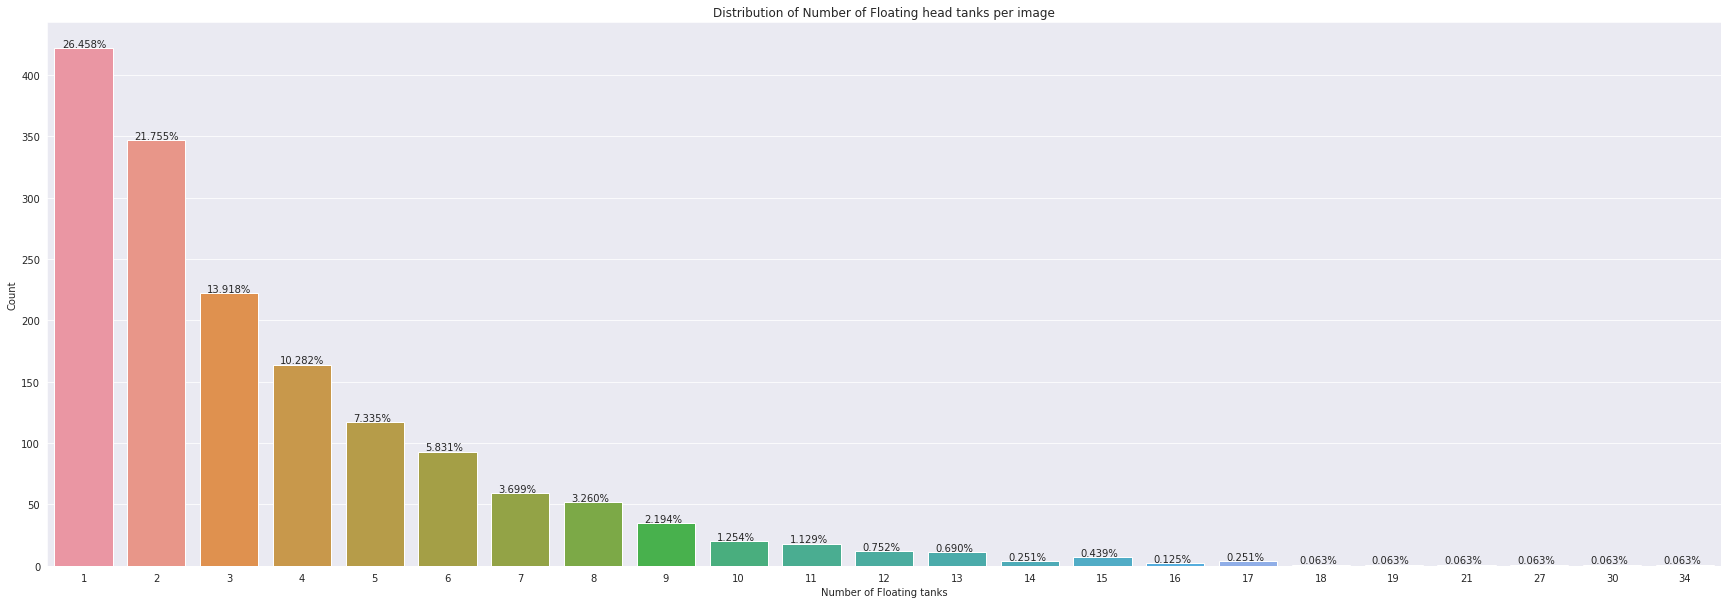

In [ ]:
distinct_labels = dict() # Distinct labels with their count
No_FHT_per_img = [] # Number of floating head tank per image
for i in range(len(json_labels)):
    if(json_labels[i]['label']=='Skip'):
        distinct_labels['Skip'] = distinct_labels.get('Skip',0) + 1
    else:
        for l in json_labels[i]['label'].keys():
            distinct_labels[l] = distinct_labels.get(l,0) + 1
            
            if(l=='Floating Head Tank'):
                No_FHT = len(json_labels[i]['label']['Floating Head Tank'])   
                No_FHT_per_img.append(No_FHT)
print(distinct_labels)

sns.set({'figure.figsize':(30,10)})
ax = sns.countplot(No_FHT_per_img)
for p in ax.patches:
    ax.annotate('{:.3f}%'.format(100*p.get_height()/len(No_FHT_per_img)), (p.get_x()+0.1, p.get_height()+1))
ax.set_title('Distribution of Number of Floating head tanks per image')
ax.set_xlabel('Number of Floating tanks')
ax.set_ylabel('Count')
plt.show()

## Exploring labels_coco.json File

This file contains bounding boxes of only Floating head tank along with their image_id in list of dictionary format

In [ ]:
json_labels_coco = json.load(open(os.path.join('data','labels_coco.json')))
print('Number of Floating tanks: ',len(json_labels_coco['annotations']))

no_unique_img_id = set()
for ann in json_labels_coco['annotations']:
    no_unique_img_id.add(ann['image_id'])
print('Number of Images that contains Floating head tank: ', len(no_unique_img_id))
json_labels_coco['annotations'][:8]

Number of Floating tanks:  5820
Number of Images that contains Floating head tank:  1595


[{'bbox': [275, 414, 59, 57], 'category_id': 1, 'image_id': 28},
 {'bbox': [416, 147, 21, 19], 'category_id': 1, 'image_id': 30},
 {'bbox': [224, 260, 91, 89], 'category_id': 1, 'image_id': 39},
 {'bbox': [313, 432, 55, 57], 'category_id': 1, 'image_id': 39},
 {'bbox': [444, 434, 52, 53], 'category_id': 1, 'image_id': 39},
 {'bbox': [201, 478, 90, 34], 'category_id': 1, 'image_id': 39},
 {'bbox': [15, 491, 57, 20], 'category_id': 1, 'image_id': 42},
 {'bbox': [364, 365, 58, 53], 'category_id': 1, 'image_id': 43}]

## Plotting Bounding Boxes

In [ ]:
def conv_bbox(box_dict):
    """
    input: box_dict-> bounding box with 4 corner points in dictionary
    Function: Obtaining top-left and bottom-right points
    output: tuple(ymin, xmin, ymax, xmax)
    """
    
    xs = np.array(list(set([i['x'] for i in box_dict])))
    ys = np.array(list(set([i['y'] for i in box_dict])))
    
    x_min = xs.min()
    x_max = xs.max()
    y_min = ys.min()
    y_max = ys.max()
    
    return y_min, x_min, y_max, x_max

In the below images you can see how three kind of tank objects look like

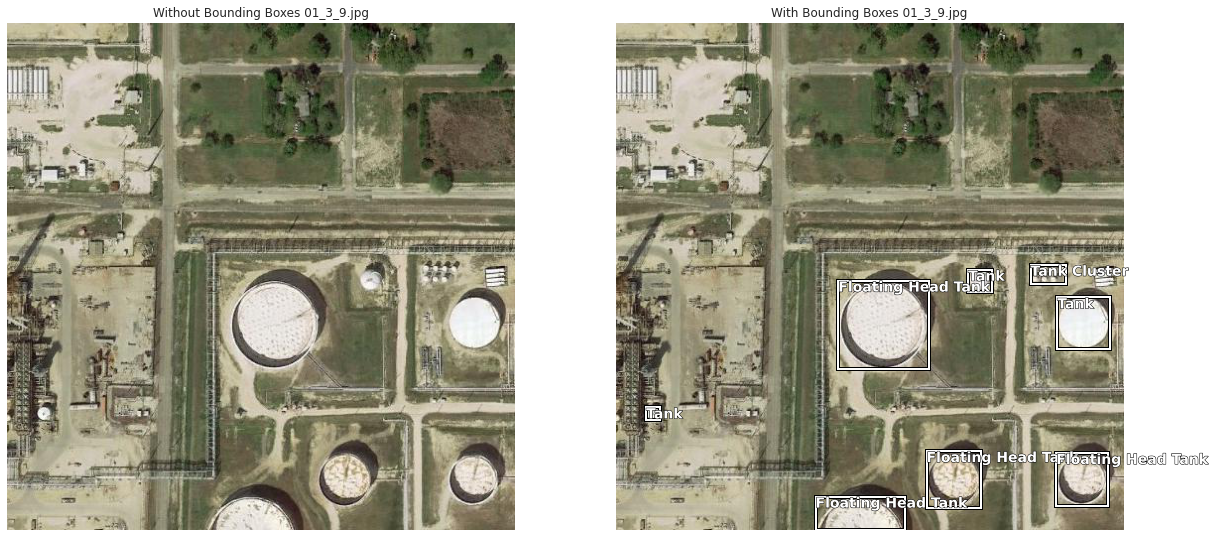

In [ ]:
def plot_BBox(img_name):
    sns.set({'figure.figsize':(20,10)})
    img_path = os.path.join('data/'+'image_patches', img_name)
    image = vision.open_image(img_path)
    fig, ax = plt.subplots(1,2)
    image.show(ax=ax[0], title= 'Without Bounding Boxes '+img_name)
    image.show(ax=ax[1], title = 'With Bounding Boxes '+img_name)

    no,row,col = map(int,img_name.split('.')[0].split('_'))
    img_id = (no-1)*100 + row*10 + col

    idx = -1
    bboxes = []
    labels = []
    classes = []
    if(json_labels[img_id]['label'] != 'Skip'):
        for label in json_labels[img_id]['label'].keys():
            for box in json_labels[img_id]['label'][label]:
                bboxes.append(conv_bbox(box['geometry']))
                classes.append(label)
        labels = list(range(len(classes)))
        idx = 1
            
    if(idx!=-1):
        BBox = vision.ImageBBox.create(*image.size, bboxes, labels, classes)
        image.show(y=BBox, ax=ax[1])
    else:
        print('No Bounding Box annotation present for Floating Head Tank ')

    plt.show()
plot_BBox('01_3_9.jpg')